In [1]:
import pandas as pd
import logging

# Log fayl manzili
log_path = r"C:\Users\Rasulbek907\Desktop\Project_8\Log\feature_selection.log"

# Log sozlamalari
logging.basicConfig(
    filename=log_path,
    filemode='a',  # Append mode
    format='%(asctime)s - %(levelname)s - %(message)s',
    level=logging.INFO
)

try:
    logging.info("CSV fayl o'qilmoqda:...")
    df = pd.read_csv(r"C:\Users\Rasulbek907\Desktop\Project_8\Data\Preprocessing\Preprosessed.csv")
    logging.info(f"Fayl muvaffaqiyatli o'qildi. Satırlar soni: {len(df)} ustunlar soni: {len(df.columns)}")
except Exception as e:
    logging.error(f"CSV faylni o'qishda xatolik: {e}")

In [2]:
df.head()

,Unnamed: 0,index,dateCrawled,name,price,vehicleType,yearOfRegistration,powerPS,model,kilometer,...,seller_gewerblich,seller_privat,offerType_Angebot,offerType_Gesuch,abtest_control,abtest_test,gearbox_automatik,gearbox_manuell,notRepairedDamage_ja,notRepairedDamage_nein
0,0,0.000000,0.586679,0.339173,2.235174e-07,0.857143,0.110346,0.00000,0.472,1.000000,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,1,0.000003,0.585720,0.017608,8.521602e-06,0.428571,0.112346,0.00950,0.472,0.827586,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,2,0.000005,0.272956,0.387805,4.563481e-06,1.000000,0.111568,0.00815,0.476,0.827586,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,3,0.000008,0.378625,0.327975,6.984919e-07,0.571429,0.111235,0.00375,0.472,1.000000,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,4,0.000011,0.824117,0.730069,1.676381e-06,0.571429,0.112012,0.00345,0.412,0.586207,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              371528 non-null  int64  
 1   index                   371528 non-null  float64
 2   dateCrawled             371528 non-null  float64
 3   name                    371528 non-null  float64
 4   price                   371528 non-null  float64
 5   vehicleType             371528 non-null  float64
 6   yearOfRegistration      371528 non-null  float64
 7   powerPS                 371528 non-null  float64
 8   model                   371528 non-null  float64
 9   kilometer               371528 non-null  float64
 10  monthOfRegistration     371528 non-null  float64
 11  fuelType                371528 non-null  float64
 12  brand                   371528 non-null  float64
 13  dateCreated             371528 non-null  float64
 14  nrOfPictures        

# Asosiy ma’lumotlarni tekshirish

In [4]:
# DataFrame o'lchami
print("Shape:", df.shape)

Shape: (371528, 27)


In [5]:
# Ustunlar nomi va turlari
print(df.dtypes)


Unnamed: 0                  int64
index                     float64
dateCrawled               float64
name                      float64
price                     float64
vehicleType               float64
yearOfRegistration        float64
powerPS                   float64
model                     float64
kilometer                 float64
monthOfRegistration       float64
fuelType                  float64
brand                     float64
dateCreated               float64
nrOfPictures              float64
postalCode                float64
lastSeen                  float64
seller_gewerblich         float64
seller_privat             float64
offerType_Angebot         float64
offerType_Gesuch          float64
abtest_control            float64
abtest_test               float64
gearbox_automatik         float64
gearbox_manuell           float64
notRepairedDamage_ja      float64
notRepairedDamage_nein    float64
dtype: object


In [6]:
# Har bir ustundagi NaN qiymatlar soni
print(df.isna().sum())

Unnamed: 0                0
index                     0
dateCrawled               0
name                      0
price                     0
vehicleType               0
yearOfRegistration        0
powerPS                   0
model                     0
kilometer                 0
monthOfRegistration       0
fuelType                  0
brand                     0
dateCreated               0
nrOfPictures              0
postalCode                0
lastSeen                  0
seller_gewerblich         0
seller_privat             0
offerType_Angebot         0
offerType_Gesuch          0
abtest_control            0
abtest_test               0
gearbox_automatik         0
gearbox_manuell           0
notRepairedDamage_ja      0
notRepairedDamage_nein    0
dtype: int64


In [7]:
# Statistik tavsif (faqat raqamli ustunlar)
print(df.describe().T)

                           count           mean            std  min  \
Unnamed: 0              371528.0  185763.500000  107251.039743  0.0   
index                   371528.0       0.500000       0.288676  0.0   
dateCrawled             371528.0       0.501657       0.289119  0.0   
name                    371528.0       0.498906       0.290253  0.0   
price                   371528.0       0.000008       0.001671  0.0   
vehicleType             371528.0       0.652318       0.240388  0.0   
yearOfRegistration      371528.0       0.111632       0.010320  0.0   
powerPS                 371528.0       0.005777       0.009607  0.0   
model                   371528.0       0.407598       0.279403  0.0   
kilometer               371528.0       0.831853       0.276637  0.0   
monthOfRegistration     371528.0       0.477870       0.309368  0.0   
fuelType                371528.0       0.276200       0.175324  0.0   
brand                   371528.0       0.530511       0.342641  0.0   
dateCr

In [11]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: ['dateCrawled', 'name', 'price', 'vehicleType', 'yearOfRegistration', 'powerPS', 'model', 'kilometer', 'monthOfRegistration', 'fuelType', 'brand', 'dateCreated', 'nrOfPictures', 'postalCode', 'lastSeen', 'seller_gewerblich', 'seller_privat', 'offerType_Angebot', 'offerType_Gesuch', 'abtest_control', 'abtest_test', 'gearbox_automatik', 'gearbox_manuell', 'notRepairedDamage_ja', 'notRepairedDamage_nein']
Categorical columns: []


In [14]:
target = 'kilometer'
X = df.drop(columns=[target])
y = df[target]

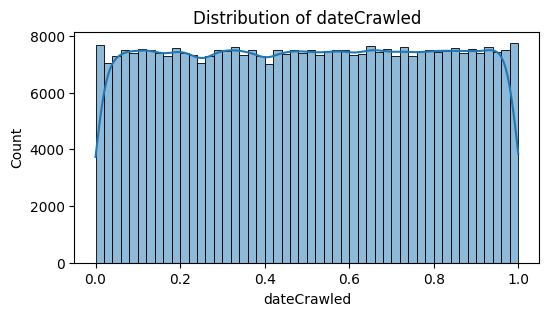

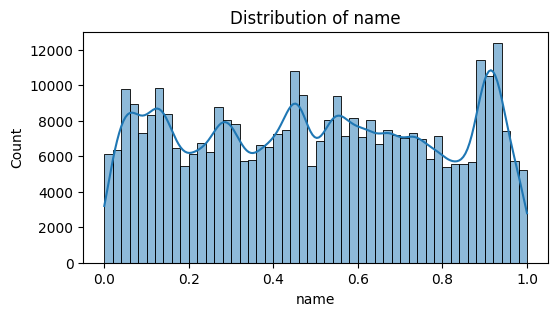

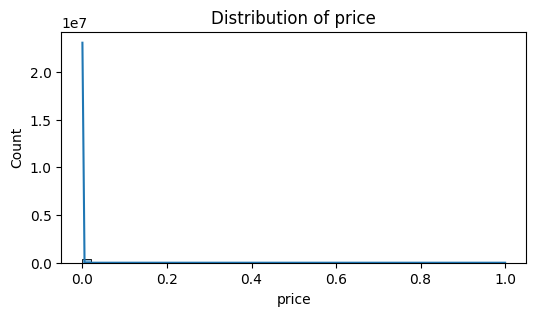

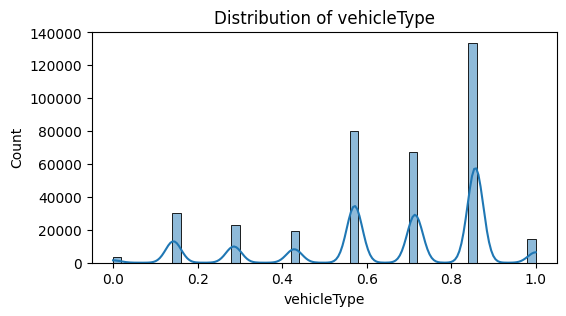

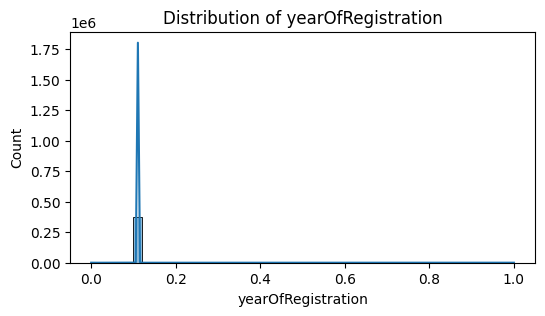

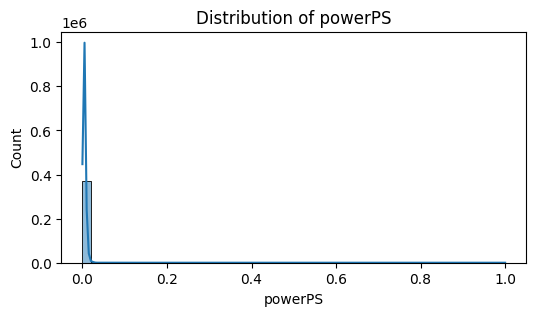

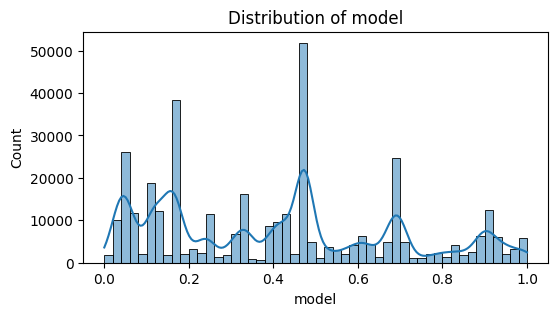

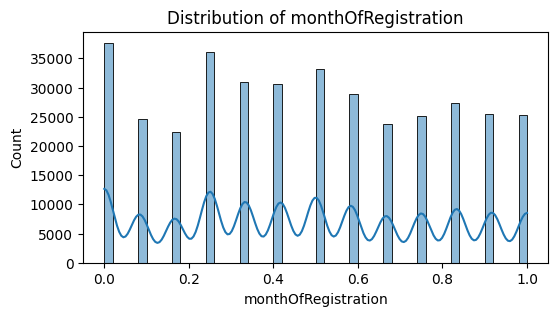

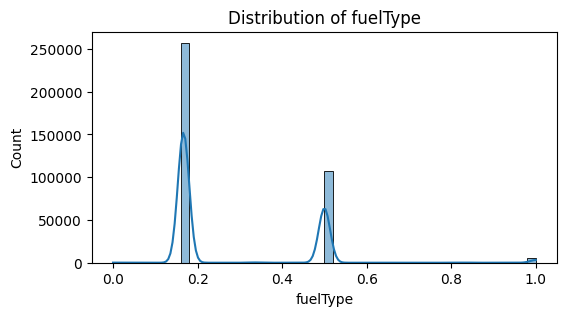

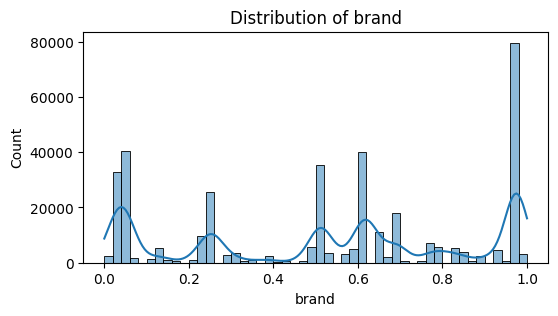

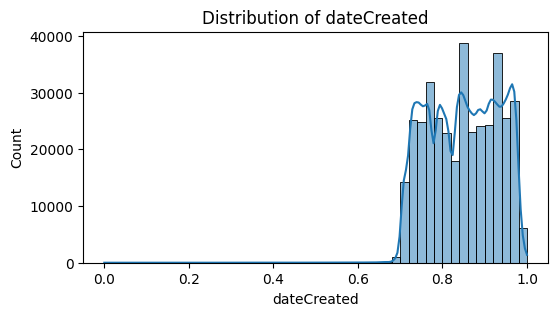

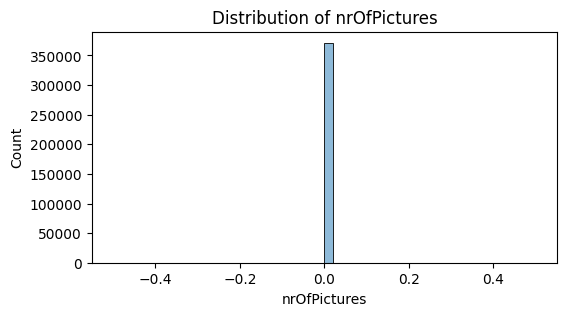

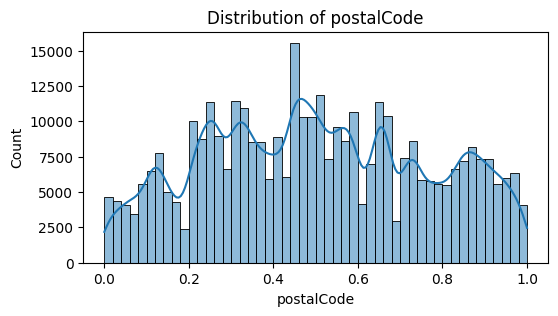

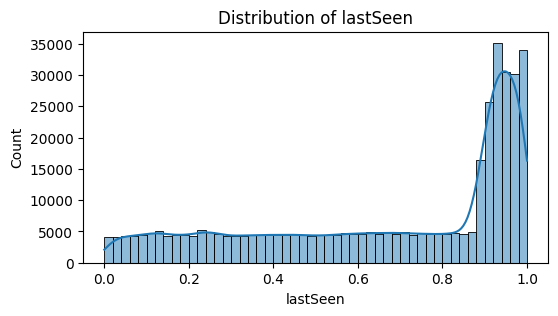

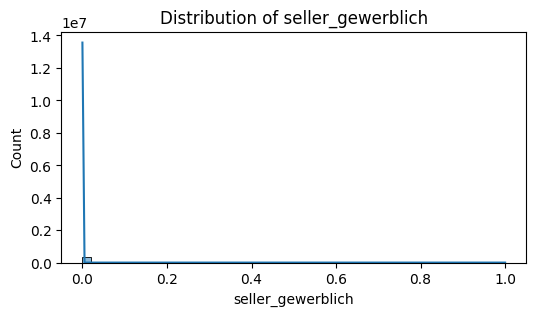

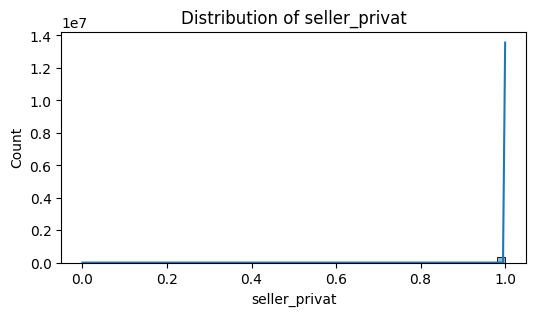

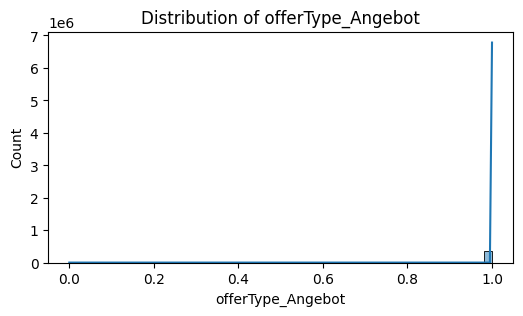

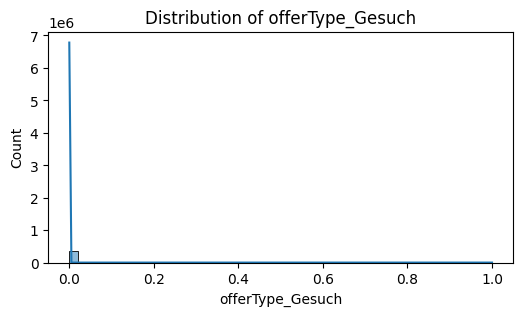

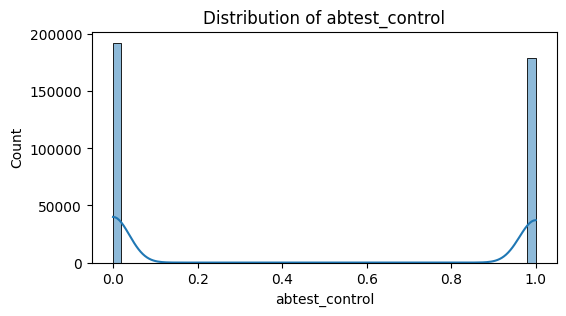

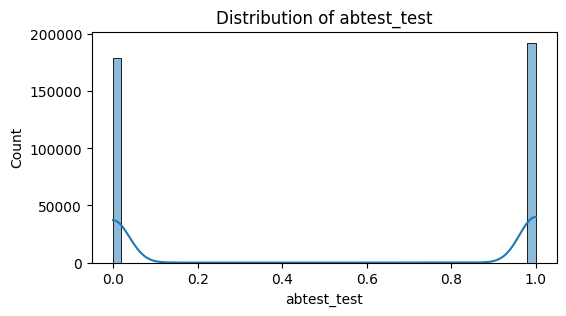

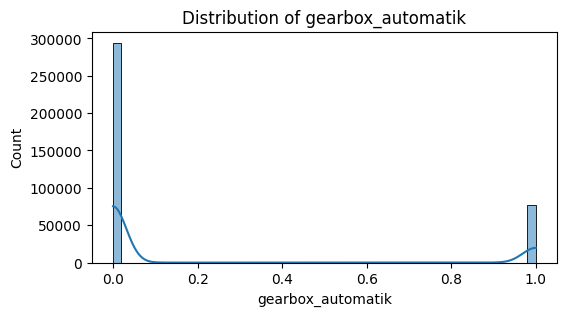

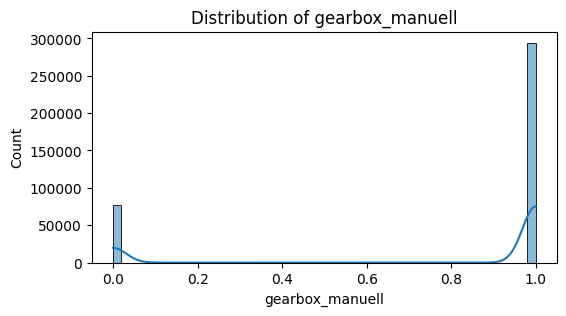

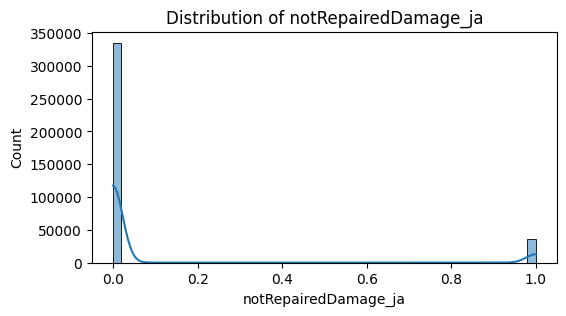

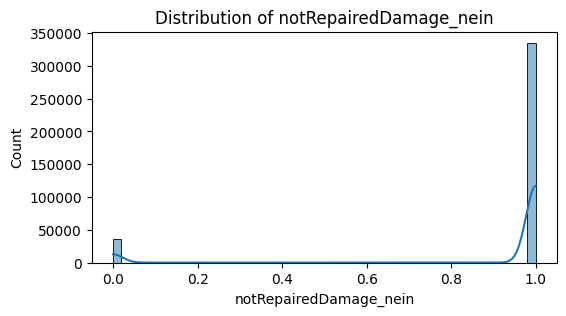

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogramlar va Outlier tahlili
for col in numerical_cols:
    if col != target:
        plt.figure(figsize=(6,3))
        sns.histplot(df[col], bins=50, kde=True)
        plt.title(f'Distribution of {col}')
        plt.show()


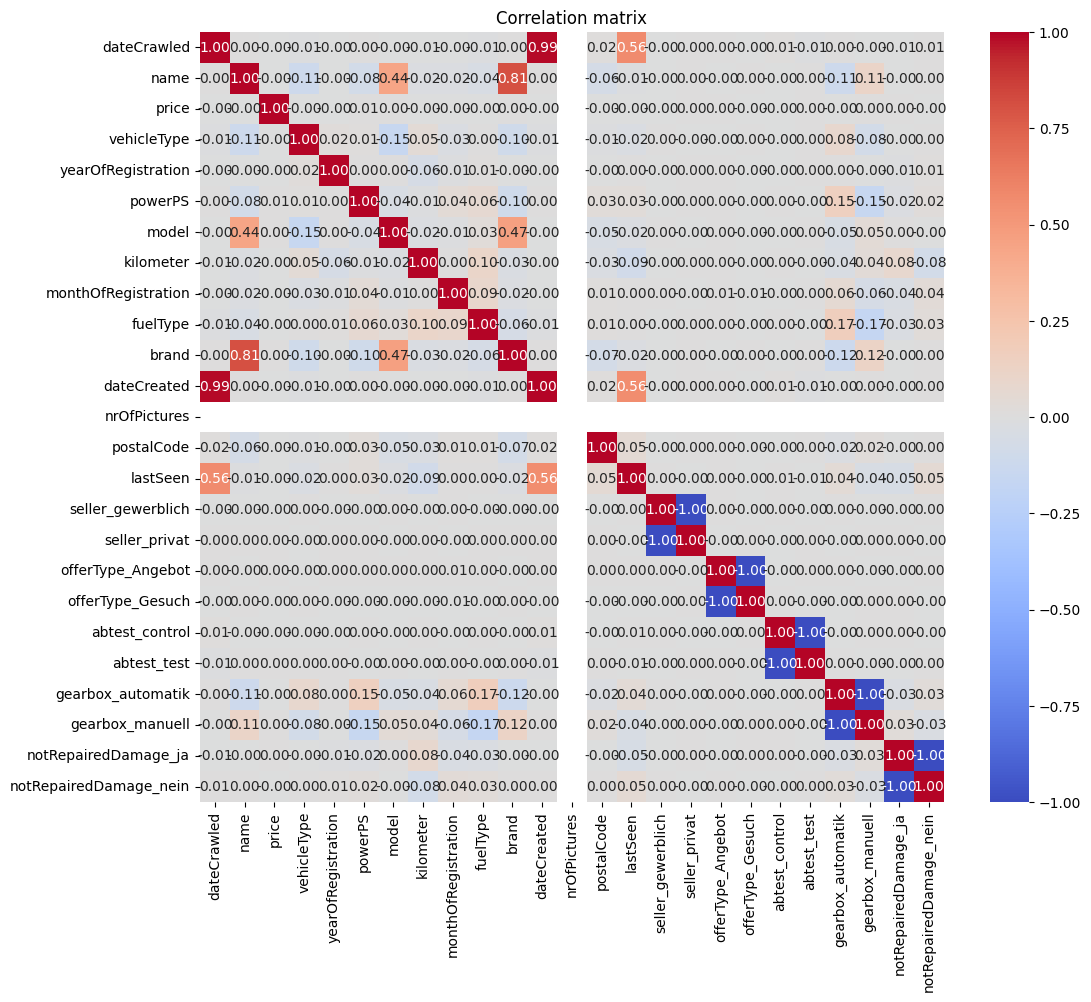

kilometer                 1.000000
fuelType                  0.104175
notRepairedDamage_ja      0.083726
vehicleType               0.045131
gearbox_manuell           0.038602
offerType_Angebot         0.004397
abtest_control            0.002744
monthOfRegistration       0.001838
seller_privat             0.000162
seller_gewerblich        -0.000162
price                    -0.000635
abtest_test              -0.002744
dateCreated              -0.003687
offerType_Gesuch         -0.004397
dateCrawled              -0.005813
powerPS                  -0.010738
model                    -0.019389
name                     -0.021135
brand                    -0.026253
postalCode               -0.026694
gearbox_automatik        -0.038602
yearOfRegistration       -0.055319
notRepairedDamage_nein   -0.083726
lastSeen                 -0.086413
nrOfPictures                   NaN
Name: kilometer, dtype: float64


In [16]:
corr_matrix = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation matrix")
plt.show()

# Target bilan korelatsiya
print(corr_matrix[target].sort_values(ascending=False))

In [1]:
from IPython.display import display, HTML

# Clickable link (button ko‘rinishida)
display(HTML("""
<a href="feature_enginering.ipynb" target="_self" style="
    display: inline-block;
    padding: 10px 20px;
    font-size: 16px;
    color: white;
    background-color: #4CAF50;
    text-align: center;
    text-decoration: none;
    border-radius: 5px;
">
Next Step
</a>
"""))
